In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read data
Data = pd.read_csv('C:/Users/enesg/Desktop/clusterproject3/train.csv')

# About Dataset

"Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually." 
To reach data : https://www.kaggle.com/mboaglio/simplifiedhuarus

# Data Exploration

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [4]:
Data.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [5]:
Data.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [6]:
Data.sample(5)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3492,9941,STANDING,0.279,-0.0192,-0.1050,-0.995,-0.929,-0.9390,-0.9960,-0.923,...,0.204,-0.551,-0.855,-0.1230,-0.0261,0.758,0.837,-0.855,0.18800,0.0646
2330,6669,SITTING,0.273,-0.0136,-0.1030,-0.992,-0.967,-0.9850,-0.9920,-0.968,...,0.253,-0.472,-0.798,-0.0108,-0.3120,0.212,-0.135,-0.572,-0.03570,-0.2560
3589,10219,WALKING,0.277,-0.0170,-0.0984,-0.475,-0.179,-0.2390,-0.4790,-0.227,...,0.200,0.397,0.143,0.1230,0.5040,-0.207,-0.143,-0.815,0.17400,0.1260
1121,3203,WALKING_DOWNSTAIRS,0.130,-0.0412,-0.0241,0.161,-0.209,0.0832,0.0921,-0.202,...,0.150,-0.634,-0.901,0.6780,0.0605,-0.766,-0.472,-0.734,0.00942,0.1870
826,2353,WALKING_DOWNSTAIRS,0.347,-0.0650,-0.1560,0.106,0.400,0.3940,-0.0568,0.292,...,0.304,-0.290,-0.650,-0.5390,-0.7170,-0.615,-0.284,-0.549,0.27600,0.2790


In [7]:
Data.columns.tolist()

['rn',
 'activity',
 'tBodyAcc.mean.X',
 'tBodyAcc.mean.Y',
 'tBodyAcc.mean.Z',
 'tBodyAcc.std.X',
 'tBodyAcc.std.Y',
 'tBodyAcc.std.Z',
 'tBodyAcc.mad.X',
 'tBodyAcc.mad.Y',
 'tBodyAcc.mad.Z',
 'tBodyAcc.max.X',
 'tBodyAcc.max.Y',
 'tBodyAcc.max.Z',
 'tBodyAcc.min.X',
 'tBodyAcc.min.Y',
 'tBodyAcc.min.Z',
 'tBodyAcc.sma',
 'tBodyAcc.energy.X',
 'tBodyAcc.energy.Y',
 'tBodyAcc.energy.Z',
 'tBodyAcc.iqr.X',
 'tBodyAcc.iqr.Y',
 'tBodyAcc.iqr.Z',
 'tBodyAcc.entropy.X',
 'tBodyAcc.entropy.Y',
 'tBodyAcc.entropy.Z',
 'tBodyAcc.arCoeff.X.1',
 'tBodyAcc.arCoeff.X.2',
 'tBodyAcc.arCoeff.X.3',
 'tBodyAcc.arCoeff.X.4',
 'tBodyAcc.arCoeff.Y.1',
 'tBodyAcc.arCoeff.Y.2',
 'tBodyAcc.arCoeff.Y.3',
 'tBodyAcc.arCoeff.Y.4',
 'tBodyAcc.arCoeff.Z.1',
 'tBodyAcc.arCoeff.Z.2',
 'tBodyAcc.arCoeff.Z.3',
 'tBodyAcc.arCoeff.Z.4',
 'tBodyAcc.correlation.X.Y',
 'tBodyAcc.correlation.X.Z',
 'tBodyAcc.correlation.Y.Z',
 'tGravityAcc.mean.X',
 'tGravityAcc.mean.Y',
 'tGravityAcc.mean.Z',
 'tGravityAcc.std.X',
 'tGr

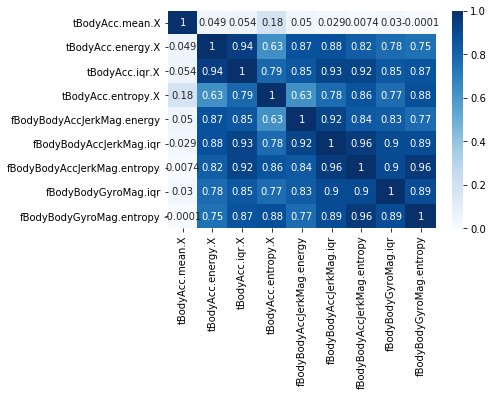

In [8]:
#Exploring with heatmap
df=Data[['tBodyAcc.mean.X','tBodyAcc.energy.X','tBodyAcc.iqr.X',
         'tBodyAcc.entropy.X','fBodyBodyAccJerkMag.energy','fBodyBodyAccJerkMag.iqr','fBodyBodyAccJerkMag.entropy',
         'fBodyBodyGyroMag.iqr','fBodyBodyGyroMag.entropy']]

sns.heatmap(df.corr(),cmap = 'Blues', annot=True)

In [9]:
Data['activity'].unique().tolist()

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

# Scaling & Optimum K-value

In [10]:
true_labels=Data['activity']
Data=Data.drop(['rn','activity'],axis=1)

In [11]:
scaler=StandardScaler()
Data=scaler.fit_transform(Data)

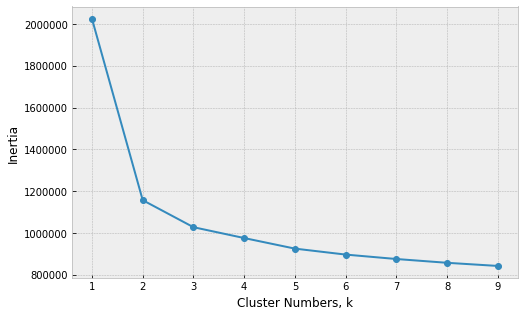

In [12]:
k_values=range(1,10)
inertias=[]

for k in k_values:
    model=KMeans(n_clusters=k)
    model.fit(Data)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(k_values,inertias, '-o')
plt.xlabel('Cluster Numbers, k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

According to elbow method; it's clear to see that optimum k value is 2.

# PCA: Find Optimum Number of Components & Apply

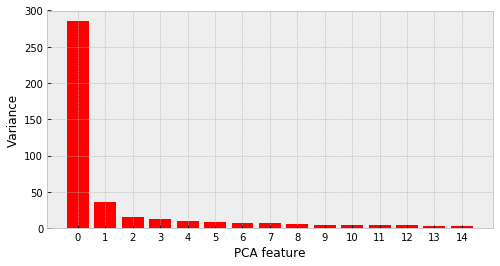

In [13]:
pca=PCA(random_state=123)
pca.fit(Data)
features=range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='red')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [14]:
'''
pcacik = PCA().fit(Data)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()
'''

"\npcacik = PCA().fit(Data)\n\n#Plotting the Cumulative Summation of the Explained Variance\nplt.figure()\nplt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.xlabel('Number of Components')\nplt.ylabel('Variance (%)') #for each component\nplt.title('Explained Variance')\nplt.show()\n"

In [15]:
#Optimum number of component for PCA is 1.
#Applying PCA and reducing dimension
pca=PCA(n_components=1, random_state=123)
Data_reduced=pca.fit_transform(Data)
print('Shape of the new Data df: ' + str(Data_reduced.shape))

Shape of the new Data df: (3609, 1)


# K-Means

In [16]:
#applying k-means to data that is not applied PCA
k_means=KMeans(n_clusters=2, random_state=123, n_init=30)
k_means.fit(Data)
c_labels = k_means.labels_
df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
ct = pd.crosstab(df['clust_label'], df['orig_label'])
y_clust = k_means.predict(Data)
display(ct)

print('inertia : %i | silhouette score :  %.3f'
    %(k_means.inertia_,
    silhouette_score(Data, y_clust, metric='euclidean')))

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia : 1156484 | silhouette score :  0.390


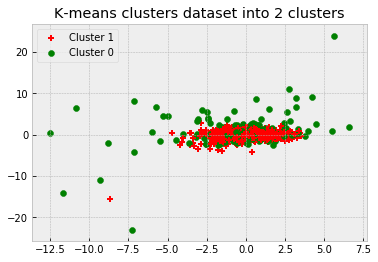

In [32]:
for i in range(0, Data.shape[0]):
    if k_means.labels_[i] == 1:
        c1 = plt.scatter(Data[i,0],Data[i,1],c='r',
        marker='+')
    elif k_means.labels_[i] == 0:
        c2 = plt.scatter(Data[i,0],Data[i,1],c='g',
        marker='o')
plt.legend([c1, c2],['Cluster 1', 'Cluster 0'])
plt.title('K-means clusters dataset into 2 clusters')
plt.show()

In [17]:
#applying k-means to data that applied PCA
k_means=KMeans(n_clusters=2, random_state=123, n_init=30)
k_means.fit(Data_reduced)
c_labels = k_means.labels_
df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
ct = pd.crosstab(df['clust_label'], df['orig_label'])
y_clust = k_means.predict(Data_reduced)
display(ct)

print('inertia: %i | silhouette score:  %.3f'
    %(k_means.inertia_,
    silhouette_score(Data_reduced, y_clust, metric='euclidean')))

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,623,668,0,0,8
1,1,0,0,603,493,533


inertia: 168716 | silhouette score:  0.794


# Another Clustering Algorithms

In [18]:
#Applying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

agglo_y_clust=cluster.fit_predict(Data_reduced)    

print('| silhouette score:  %.3f'
    %silhouette_score(Data_reduced, agglo_y_clust, metric='euclidean'))

| silhouette score:  0.792


In [19]:
#Applying Birch
from sklearn.cluster import Birch

brc= Birch(branching_factor=50, n_clusters=11, threshold=0.5,compute_labels=True)

brc.fit(Data_reduced)

birch_y_clust=brc.predict(Data_reduced)

print('| silhouette score:  %.3f'
    %silhouette_score(Data_reduced, birch_y_clust, metric='euclidean'))

C:\Users\enesg\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:77: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  node1_dist, node2_dist = dist[[farthest_idx]]


| silhouette score:  0.623


# Another Dimensionality Reduction Method

In [20]:
#Applying Feature agglomeration
from sklearn import datasets, cluster
agglo = cluster.FeatureAgglomeration(connectivity=None,n_clusters=2)

agglo.fit(Data)
X_reduced = agglo.transform(Data)

# Applying Clustering Algorithms on the new Dimension Reduced Data

In [21]:
k_means=KMeans(n_clusters=2, random_state=123, n_init=30)
k_means.fit(X_reduced)
c_labels = k_means.labels_
df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
ct = pd.crosstab(df['clust_label'], df['orig_label'])
y_clust = k_means.predict(X_reduced)
display(ct)

print('inertia: %i | silhouette score:  %.3f'
    %(k_means.inertia_,
    silhouette_score(X_reduced, y_clust, metric='euclidean')))

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,623,668,1,1,18
1,1,0,0,602,492,523


inertia: 537 | silhouette score:  0.755


In [22]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

agglo_y_clust=cluster.fit_predict(X_reduced)    

print('| silhouette score:  %.3f'
    %silhouette_score(X_reduced, agglo_y_clust, metric='euclidean'))

| silhouette score:  0.755


In [23]:
from sklearn.cluster import Birch

brc= Birch(branching_factor=50, n_clusters=11, threshold=0.5,compute_labels=True)

brc.fit(X_reduced)

birch_y_clust=brc.predict(X_reduced)

print('| silhouette score:  %.3f'
    %silhouette_score(X_reduced, birch_y_clust, metric='euclidean'))

C:\Users\enesg\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (7) by Birch is less than (11). Decrease the threshold.
  % (len(centroids), self.n_clusters))


| silhouette score:  0.697


As we can see in the silhouette scores: the best combination is PCA + K-Means algorithm.